In [1]:
# Import thư viện pandas để xử lý dữ liệu dạng bảng (DataFrame)
import pandas as pd

# Import thư viện pyplot từ matplotlib để vẽ biểu đồ
from matplotlib import pyplot as plt

# Import SVC (Support Vector Classification) từ sklearn.svm để xây dựng mô hình phân loại SVM
from sklearn.svm import SVC

# Import hàm train_test_split từ sklearn.model_selection để chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

# Import LabelEncoder từ sklearn.preprocessing để chuyển đổi các nhãn (labels) thành dạng số
from sklearn.preprocessing import LabelEncoder

# Import joblib để lưu và tải mô hình đã huấn luyện (serialization)
import joblib


In [ ]:
# Đọc dữ liệu từ file CSV có tên 'iris.csv' và lưu vào biến iris_df dưới dạng DataFrame
iris_df = pd.read_csv('iris.csv')

# Hiển thị 5 dòng đầu tiên của DataFrame để xem trước dữ liệu
iris_df.head() 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# Tạo đối tượng LabelEncoder để mã hóa các nhãn (loài hoa) thành dạng số
species = LabelEncoder()

# Sử dụng phương thức fit để học các giá trị nhãn từ cột 'species' trong DataFrame iris_df
species.fit(iris_df['species'])

# Lưu các tên loài hoa vào biến names (lưu dưới dạng mảng các giá trị nhãn gốc)
names = species.classes_


In [34]:
# Tách dữ liệu đầu vào (features) từ DataFrame iris_df
x_data = iris_df[iris_df.columns[0:4]]  # Lấy 4 cột đầu tiên (chiều dài, chiều rộng đài hoa và cánh hoa)

# Tách dữ liệu đầu ra (labels) và mã hóa chúng thành số bằng LabelEncoder
y_data = species.fit_transform(iris_df['species'])  # Sử dụng LabelEncoder để chuyển đổi tên loài hoa thành số


In [5]:
# Lọc dữ liệu để tạo các DataFrame riêng biệt cho từng loài hoa

s1=iris_df[iris_df.species=='Iris-setosa']
s2=iris_df[iris_df.species=='Iris-versicolor']
s3=iris_df[iris_df.species=='Iris-virginica']

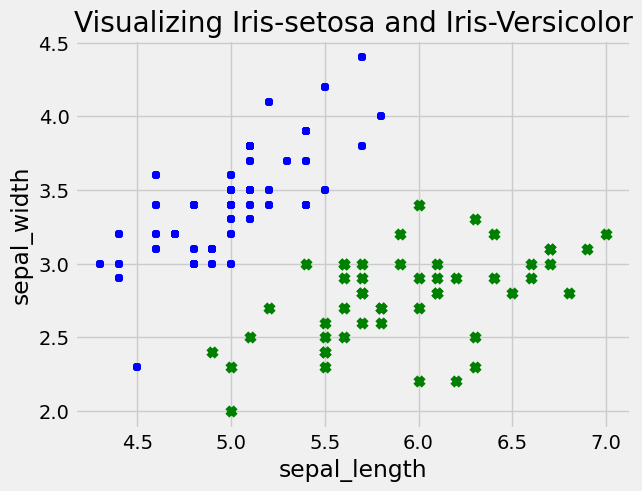

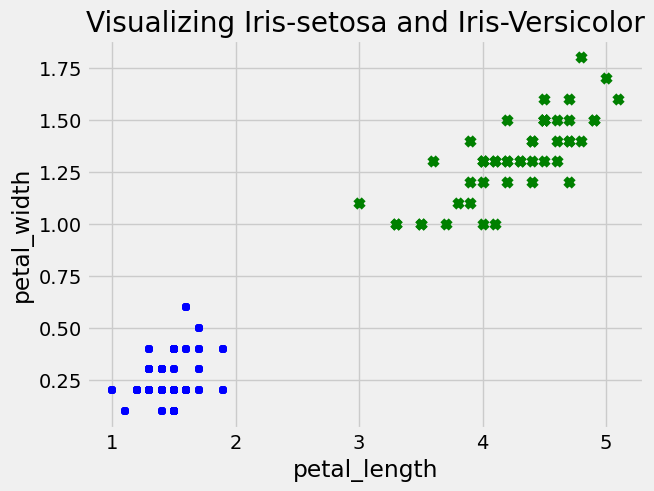

In [35]:
# Vẽ biểu đồ phân tán giữa chiều dài và chiều rộng của đài hoa cho hai loài Iris-setosa và Iris-versicolor
plt.title('Visualizing Iris-setosa and Iris-Versicolor') 
plt.style.use('fivethirtyeight')  
plt.scatter(s1['sepal_length'], s1['sepal_width'], marker='+', color='b')  # Vẽ Iris-setosa với dấu '+' và màu xanh
plt.scatter(s2['sepal_length'], s2['sepal_width'], marker='x', color='g')  # Vẽ Iris-versicolor với dấu 'x' và màu xanh lá
plt.xlabel('sepal_length')  # Nhãn trục x
plt.ylabel('sepal_width')  # Nhãn trục y
plt.show() 

# Vẽ biểu đồ phân tán giữa chiều dài và chiều rộng của cánh hoa cho hai loài Iris-setosa và Iris-versicolor
plt.title('Visualizing Iris-setosa and Iris-Versicolor')  
plt.style.use('fivethirtyeight') 
plt.scatter(s1['petal_length'], s1['petal_width'], marker='+', color='b')  # Vẽ Iris-setosa với dấu '+' và màu xanh
plt.scatter(s2['petal_length'], s2['petal_width'], marker='x', color='g')  # Vẽ Iris-versicolor với dấu 'x' và màu xanh lá
plt.xlabel('petal_length')  # Nhãn trục x
plt.ylabel('petal_width')  # Nhãn trục y
plt.show() 


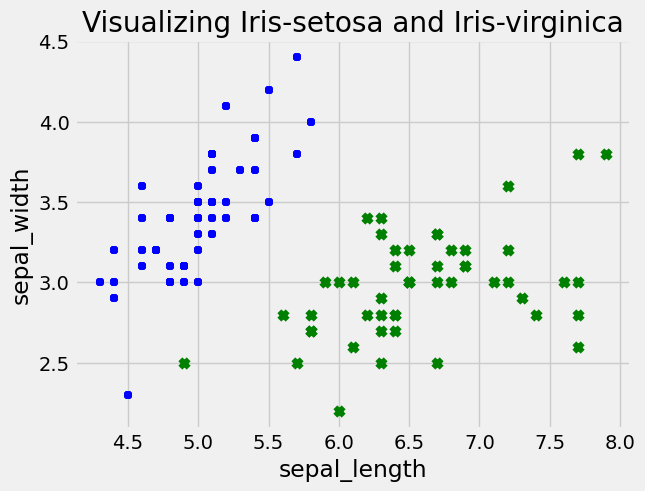

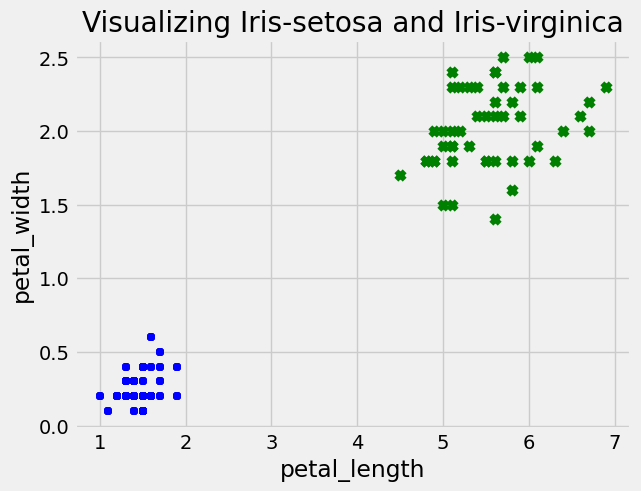

In [7]:
# Vẽ biểu đồ phân tán giữa chiều dài và chiều rộng của đài hoa cho hai loài Iris-setosa và Iris-virginica
plt.title('Visualizing Iris-setosa and Iris-virginica')  
plt.style.use('fivethirtyeight')  
plt.scatter(s1['sepal_length'], s1['sepal_width'], marker='+', color='b')  # Vẽ Iris-setosa với dấu '+' và màu xanh
plt.scatter(s3['sepal_length'], s3['sepal_width'], marker='x', color='g')  # Vẽ Iris-virginica với dấu 'x' và màu xanh lá
plt.xlabel('sepal_length') 
plt.ylabel('sepal_width')  
plt.show()  

# Vẽ biểu đồ phân tán giữa chiều dài và chiều rộng của cánh hoa cho hai loài Iris-setosa và Iris-virginica
plt.title('Visualizing Iris-setosa and Iris-virginica')  
plt.style.use('fivethirtyeight')  
plt.scatter(s1['petal_length'], s1['petal_width'], marker='+', color='b')  # Vẽ Iris-setosa với dấu '+' và màu xanh
plt.scatter(s3['petal_length'], s3['petal_width'], marker='x', color='g')  # Vẽ Iris-virginica với dấu 'x' và màu xanh lá
plt.xlabel('petal_length')  
plt.ylabel('petal_width') 
plt.show()  


In [8]:
#chia dữ liệu thành tập huấn luyện và kiểm tra

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20) 

In [9]:
#Kiểm tra số lượng phần tử trong dữ liệu đầu vào có = với dữ liệu đầu ra ko
# -> Kt xem số lượng mẫu trong tập huấn luyện (x_train) có bằng với số lượng nhãn tương ứng (y_train) hay không.

print(len(x_train)==len(y_train)) 
print(len(x_test)==len(y_test))

True
True


In [10]:
# In ra kích thước của tập huấn luyện (X train) và nhãn tương ứng (Y train)
print("X train shape: ",x_train.shape)
print("Y train shape: ",y_train.shape)
print("X test shape: ",x_test.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (120, 4)
Y train shape:  (120,)
X test shape:  (30, 4)
Y test shape:  (30,)


In [36]:
# Tạo mô hình SVM với tham số gamma='auto' (gamma được thiết lập tự động)
model = SVC(gamma='auto')  # Sử dụng Support Vector Classification (SVC) để tạo mô hình phân loại

model.fit(x_train, y_train)  # Fit mô hình với dữ liệu đầu vào x_train và nhãn y_train

accuracy = model.score(x_test, y_test)  # Sử dụng phương thức score để tính toán độ chính xác

# In ra độ chính xác của mô hình dưới dạng phần trăm
print(f"Độ chính xác của mô hình là: {accuracy * 100:.2f}%") 


Độ chính xác của mô hình là: 96.67%


In [ ]:
# Dự đoán nhãn cho tập kiểm tra x_test bằng mô hình đã huấn luyện
pred = model.predict(x_test)

# In ra kết quả dự đoán cho từng mẫu trong tập kiểm tra
for i in range(len(pred)):  
    print('Data:') 
    print(x_test.iloc[i])
    print('\nActual:', names[y_test[i]], '\nPredicted:', names[pred[i]]) 


Data:
sepal_length    6.1
sepal_width     2.6
petal_length    5.6
petal_width     1.4
Name: 134, dtype: float64

Actual: Iris-virginica 
Predicted: Iris-virginica



Data:
sepal_length    6.1
sepal_width     2.8
petal_length    4.7
petal_width     1.2
Name: 73, dtype: float64

Actual: Iris-versicolor 
Predicted: Iris-versicolor



Data:
sepal_length    6.6
sepal_width     3.0
petal_length    4.4
petal_width     1.4
Name: 75, dtype: float64

Actual: Iris-versicolor 
Predicted: Iris-versicolor



Data:
sepal_length    5.0
sepal_width     3.6
petal_length    1.4
petal_width     0.2
Name: 4, dtype: float64

Actual: Iris-setosa 
Predicted: Iris-setosa



Data:
sepal_length    6.2
sepal_width     2.2
petal_length    4.5
petal_width     1.5
Name: 68, dtype: float64

Actual: Iris-versicolor 
Predicted: Iris-versicolor



Data:
sepal_length    5.8
sepal_width     2.7
petal_length    4.1
petal_width     1.0
Name: 67, dtype: float64

Actual: Iris-versicolor 
Predicted: Iris-versicolor



Data:
se

In [22]:
joblib.dump(model,'iris_model') #lưu trữ mô hình dưới dạng tệp nhị phân

['iris_model']

In [14]:
# Tải mô hình đã lưu trước đó từ file 'iris_model' sử dụng joblib
mj=joblib.load('iris_model')
p=mj.predict([[5.5,2.4,3.8,1.1]])
names[p[0]]

c:\Users\ASUS\Documents\TTNT\Project\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'Iris-versicolor'